In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('churn_data.csv')

# Display the first few rows of the dataframe
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
# Drop the customerID column
df = df.drop(columns=['customerID'])

# Display the first few rows of the dataframe
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convert TotalCharges column to appropriate numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display the data types to verify the changes
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
df.shape

(7043, 20)

In [9]:
# Remove rows with missing values in the TotalCharges column
df = df.dropna(subset=['TotalCharges'])

df.shape

(7032, 20)

In [10]:
# Convert the target variable 'Churn' to binary
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_2476/1388355556.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [11]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [12]:
# Select columns with object data type (strings)
string_columns = df.select_dtypes(include=['object']).columns

# Get the number of unique values in each string column
unique_values = df[string_columns].nunique()
print(unique_values)

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64


In [13]:
# Perform one-hot encoding on the columns with non-numeric data as 1s and 0s
df = pd.get_dummies(df, columns=string_columns, dtype=int) 

# Display the first few rows of the encoded dataframe
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [14]:
df.shape

(7032, 46)

In [15]:
# Get the data types of each column
data_types = df.dtypes

# Get the count of each data type
data_type_counts = data_types.value_counts()

print(data_type_counts)

int64      44
float64     2
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the scaled dataframe
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
# Convert the Churn column to integer type
df['Churn'] = df['Churn'].astype(int)

# Display the first few rows to verify the changes
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Get the data types of each column
data_types = df.dtypes

# Get the count of each data type
data_type_counts = data_types.value_counts()

print(data_type_counts)

float64    45
int64       1
Name: count, dtype: int64


In [19]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("There are no missing values.")

There are no missing values.


In [20]:
# Define the target variable 'y' and the feature set 'X'
# y = df['Churn']
# X = df.drop(columns=['Churn'])

# Display the first few rows of X to verify
# X.head()

In [21]:
# y.value_counts()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Churn' is the target column
# Separate the data into the two classes
class_A = df[df['Churn'] == 0]
class_B = df[df['Churn'] == 1]

# Downsample class A to 1121 data points
class_A_downsampled = class_A.sample(n=1121, random_state=42)

# Use all data points from class B for training
class_B_training = class_B.sample(n=1121, random_state=42)

# Combine the downsampled class A and class B for the training set
training_set = pd.concat([class_A_downsampled, class_B_training])

# Use the remaining data points for evaluation and test sets
remaining_class_A = class_A.drop(class_A_downsampled.index)
remaining_class_B = class_B.drop(class_B_training.index)

# Combine the remaining data points
remaining_data = pd.concat([remaining_class_A, remaining_class_B])

# Split the remaining data into evaluation and test sets
eval_set, test_set = train_test_split(remaining_data, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", training_set.shape)
print("Evaluation set shape:", eval_set.shape)
print("Test set shape:", test_set.shape)

Training set shape: (2242, 46)
Evaluation set shape: (2395, 46)
Test set shape: (2395, 46)


In [23]:
# Check the distribution of 1s and 0s in the training set
training_class_distribution = training_set['Churn'].value_counts()
print("Class distribution in the training set:")
print(training_class_distribution)

# Check the distribution of 1s and 0s in the evaluation set
eval_class_distribution = eval_set['Churn'].value_counts()
print("\nClass distribution in the evaluation set:")
print(eval_class_distribution)

# Check the distribution of 1s and 0s in the test set
test_class_distribution = test_set['Churn'].value_counts()
print("\nClass distribution in the test set:")
print(test_class_distribution)

Class distribution in the training set:
Churn
0    1121
1    1121
Name: count, dtype: int64

Class distribution in the evaluation set:
Churn
0    2018
1     377
Name: count, dtype: int64

Class distribution in the test set:
Churn
0    2024
1     371
Name: count, dtype: int64


In [24]:
# Separate features and target for the training set
X_train = training_set.drop(columns=['Churn'])
y_train = training_set['Churn']

# Separate features and target for the evaluation set
X_eval = eval_set.drop(columns=['Churn'])
y_eval = eval_set['Churn']

# Separate features and target for the test set
X_test = test_set.drop(columns=['Churn'])
y_test = test_set['Churn']

# Display the shapes of the resulting sets
print("Training set shapes: X_train:", X_train.shape, "y_train:", y_train.shape)
print("Evaluation set shapes: X_eval:", X_eval.shape, "y_eval:", y_eval.shape)
print("Test set shapes: X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shapes: X_train: (2242, 45) y_train: (2242,)
Evaluation set shapes: X_eval: (2395, 45) y_eval: (2395,)
Test set shapes: X_test: (2395, 45) y_test: (2395,)


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

# Define the neural network model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_eval, y_eval))


Epoch 1/100


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5144 - loss: 0.8176 - val_accuracy: 0.6672 - val_loss: 0.6524
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5463 - loss: 0.6912 - val_accuracy: 0.6810 - val_loss: 0.6197
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6362 - loss: 0.6376 - val_accuracy: 0.7081 - val_loss: 0.5728
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.6254 - val_accuracy: 0.6839 - val_loss: 0.5746
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 0.6382 - val_accuracy: 0.7044 - val_loss: 0.5526
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.6018 - val_accuracy: 0.7177 - val_loss: 0.5291
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - loss: 0.5893 - val_accuracy: 0.7165 - val_loss: 0.5305
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - loss: 0.5790 - val_accuracy: 0.7269 - val_loss: 0.5

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.7302 - loss: 0.5305


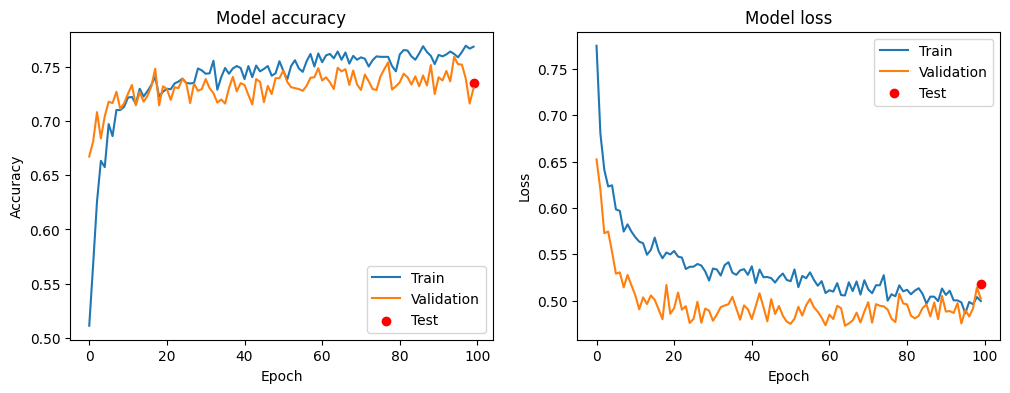

In [66]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.scatter(len(history.history['accuracy']) - 1, test_accuracy, color='r', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.scatter(len(history.history['loss']) - 1, test_loss, color='r', label=f'Test Loss: {test_loss:.4f}')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')

plt.show()